In [1]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
from MLProject2Dataset import *
from CNNModels import *
import matplotlib.pyplot as plt

In [2]:
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# batch_size = 4

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# ΑΠΛΟ ΣΝΔ

- Input             3 * 50 * 62 = 9300
- 1st conv          32 * 48 * 60 = 92160
- 1st maxpool       32 * 24 * 30 = 23040
- 2nd conv          64 * 22 * 28 = 39424
- 2nd maxpool       64 * 11 * 14 = 9856
- 3rd conv          64 * 9 * 12 = 6912
- 3rd maxpool       64 * 4 * 6 = 1536


### Train

In [3]:
dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms(50, 62))
# dataset = MLProject2DatasetSmall('./data/dermoscopy_classification', transform=image_transforms(50, 62))

generator = torch.Generator().manual_seed(42)
train, validate, test = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [4]:
len(dataset)

10015

In [5]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)

In [6]:
device = ("cuda" if torch.cuda.is_available()
          else "mps" if torch.backends.mps.is_available()
          else "cpu")

model = SimpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

### Tensorboard - TBD

In [7]:
#TODO

### Training

In [8]:
batch, t_loss, t_acc, v_loss, v_acc = train_fn(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cuda
[Epoch: 0, batch:    10] Train loss: 1.292927, Train acc: 0.612500 | Validation loss: 1.081211, Validation acc: 0.667333
[Epoch: 0, batch:    20] Train loss: 1.195105, Train acc: 0.635156 | Validation loss: 1.024147, Validation acc: 0.667333
[Epoch: 0, batch:    30] Train loss: 1.083681, Train acc: 0.645833 | Validation loss: 1.200802, Validation acc: 0.636364
[Epoch: 0, batch:    40] Train loss: 1.081874, Train acc: 0.653516 | Validation loss: 1.034891, Validation acc: 0.667333
[Epoch: 0, batch:    50] Train loss: 1.060107, Train acc: 0.653125 | Validation loss: 0.952866, Validation acc: 0.667333
[Epoch: 0, batch:    60] Train loss: 0.986368, Train acc: 0.657031 | Validation loss: 0.989448, Validation acc: 0.668332
[Epoch: 0, batch:    70] Train loss: 0.994585, Train acc: 0.658259 | Validation loss: 0.950890, Validation acc: 0.668332
[Epoch: 0, batch:    80] Train loss: 1.002103, Train acc: 0.660156 | Validation loss: 0.978577, Validation acc: 0.668332
[Epoch: 0, batc

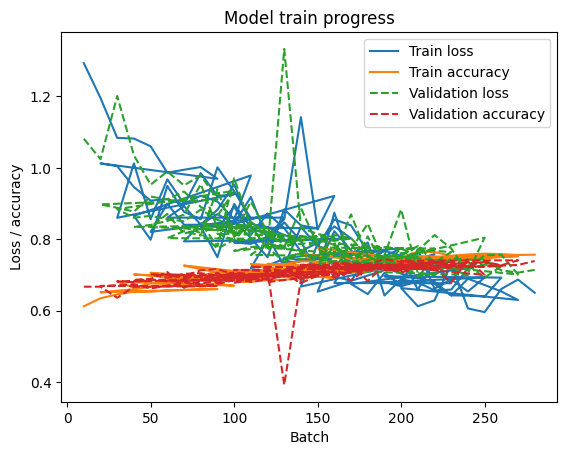

In [9]:
plt.title('Model train progress')
plt.xlabel('Batch')
plt.ylabel('Loss / accuracy')
plt.plot(batch, t_loss, label='Train loss')
plt.plot(batch, t_acc, label='Train accuracy')
plt.plot(batch, v_loss, '--', label='Validation loss')
plt.plot(batch, v_acc, '--', label='Validation accuracy')
plt.legend()
plt.show()